## Preprocessing

In [73]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [74]:
# Drop the non-beneficial ID column, 'EIN'
# ** try dropping only the EIN to see if keeping name affects accuracy
application_df = application_df.drop(columns=["EIN"])

In [75]:
# Determine the number of unique values in each column.
application_df.nunique()

NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

In [76]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()

application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [77]:
# look at NAME value counts for binning
name = application_df["NAME"].value_counts()
name

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [78]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace. 
application_types_to_replace = list(application_type[application_type < 500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [79]:
# Choose a cutoff value and create a list of names to be replaced

name_cutoff = 6
name_count = application_df["NAME"].value_counts()
names_to_replace = name_count[name_count < name_cutoff].index

# Replace in dataframe
for app in names_to_replace:
    application_df["NAME"] = application_df["NAME"].replace(app, "Other")

# Check to make sure binning was successful
application_df["NAME"].value_counts()

Other                                           20043
PARENT BOOSTER USA INC                           1260
TOPS CLUB INC                                     765
UNITED STATES BOWLING CONGRESS INC                700
WASHINGTON STATE UNIVERSITY                       492
                                                ...  
HABITAT FOR HUMANITY INTERNATIONAL                  6
DAMAGE PREVENTION COUNCIL OF TEXAS                  6
FLEET RESERVE ASSOCIATION                           6
HUGH OBRIAN YOUTH LEADERSHIP                        6
INTERNATIONAL CONGRESS OF CHURCHES MINISTERS        6
Name: NAME, Length: 355, dtype: int64

In [80]:
# Look at CLASSIFICATION value counts for binning
classification = application_df["CLASSIFICATION"].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [81]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification.loc[classification > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [82]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# ** ** adjust number to 500
classifications_to_replace = list(classification[classification < 500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [83]:

# check datatypes first 
application_df.dtypes

NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [84]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df, dtype=int)
dummies_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,NAME_AACE INTERNATIONAL,NAME_ACE MENTOR PROGRAM OF AMERICA INC,NAME_AFRICAN-AMERICAN POSTAL LEAGUE UNITED FOR SUCCESS A-PLUS,NAME_AIR FORCE ASSOCIATION,NAME_ALABAMA FEDERATION OF WOMENS CLUBS,NAME_ALABAMA TREASURE FOREST ASSOCIATION,NAME_ALBANY STATE UNIVERSITY NATIONAL ALUMNI ASSOCIATION,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [85]:
# Split our preprocessed data into our features and target arrays
y = dummies_df["IS_SUCCESSFUL"].values
X = dummies_df.drop(columns="IS_SUCCESSFUL").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [86]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [87]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 80)                32000     
                                                                 
 dense_19 (Dense)            (None, 30)                2430      
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 34461 (134.61 KB)
Trainable params: 34461 (134.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [88]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [89]:
# Train the model
# add checkpoints
checkpoints = "./checkpoints/weights.{epoch:02d}.hdf5"

# callback func to save every 5 epochs
callback = ModelCheckpoint(
    filepath=checkpoints,
    verbose=5,
    save_weights_only=True,
    save_freq="epoch",
    period=5,
)

# ** adjust number of epochs to 50
fit_model = nn.fit(X_train_scaled,y_train,validation_data=(X_test_scaled, y_test),epochs=50,callbacks=[callback])

Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.4738 - accuracy: 0.7730 - val_loss: 0.4388 - val_accuracy: 0.7917
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4346 - accuracy: 0.7921 - val_loss: 0.4377 - val_accuracy: 0.7908
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.7938 - val_loss: 0.4354 - val_accuracy: 0.7962
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4283 - accuracy: 0.7946 - val_loss: 0.4370 - val_accuracy: 0.7946
Epoch 5/50
794/804 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7947
Epoch 5: saving model to ./checkpoints/weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.4264 - accuracy: 0.7949 - val_loss: 0.4360 - val_accuracy: 0.7904
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.7956 - val_loss: 0.4385 - val_accuracy: 0.7911
Epoch 7/

In [90]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.4550 - accuracy: 0.7936 - 228ms/epoch - 851us/step
Loss: 0.45499342679977417, Accuracy: 0.793586015701294


In [91]:
# Export our model to HDF5 file
nn.save('alphabet-soup-optimized.h5')

/Users/siobhan/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


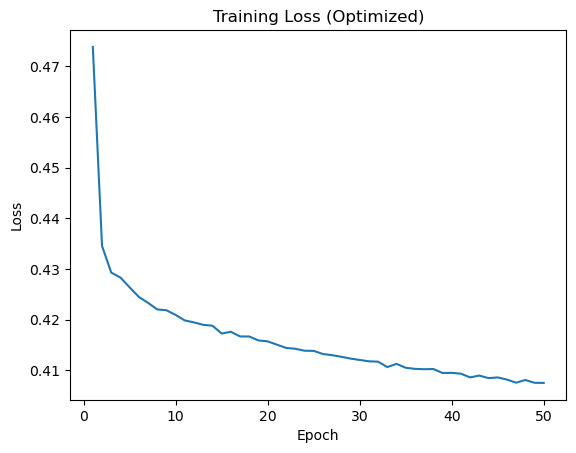

In [92]:
# create training dataframe and add +1 to equal number of epochs
training_df = pd.DataFrame(fit_model.history)
training_df.index += 1


# create  loss plot
plt.plot(training_df["loss"])
plt.title("Training Loss (Optimized)")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# save and display
plt.savefig("./images/loss-optimized.png")
plt.show()

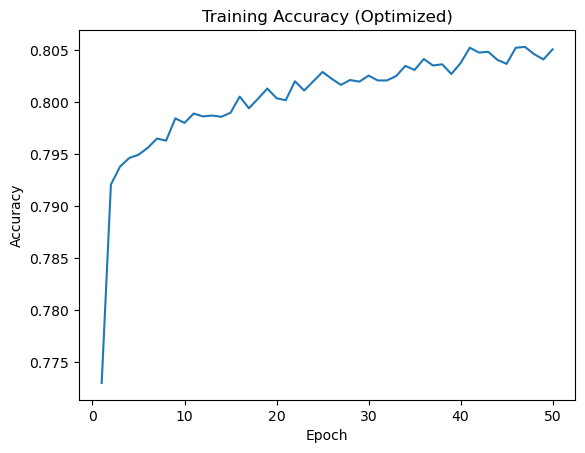

In [93]:
# create accuracy plot
plt.plot(training_df["accuracy"])
plt.title("Training Accuracy (Optimized)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# save and display
plt.savefig("./images/accuracy-optimized.png")
plt.show()